In [163]:
from box import Box
from utils.util import read_yaml
import pandas as pd
from matplotlib import pyplot as plt
import missingno as msno

import numpy as np
import plotly.figure_factory as ff
import seaborn as sns
import plotly.graph_objects as go

import plotly.io as pio
# pio.renderers.default = 'notebook'

### Data Loading

In [164]:
cfg = Box(read_yaml('../src/conf/config.yaml'))

In [165]:
df = pd.read_csv(cfg.path.new_recent_data, parse_dates=['Date'], index_col=['Date'])
df.head()

T2.OXO.5FI696 Augusta  T2.OXO.5FIC600 Augusta   
Date                                                                 
2022-07-07 12:00:00                    NaN               18.099779  \
2022-07-07 13:00:00                    NaN               18.102222   
2022-07-07 15:00:00               0.808354               18.164176   
2022-07-12 14:00:00            9732.920898             1969.954468   
2022-07-12 15:00:00            9793.585449             2186.951233   

                     T2.OXO.5FIC601 Augusta  T2.OXO.5FIC608A Augusta   
Date                                                                   
2022-07-07 12:00:00                     NaN                      NaN  \
2022-07-07 13:00:00                     NaN                      NaN   
2022-07-07 15:00:00                     NaN                 0.000000   
2022-07-12 14:00:00                     NaN               473.170868   
2022-07-12 15:00:00                     NaN               563.453438   

                     T2.OXO.5FIC608B Augusta  T2.OXO.5FIC612A Augusta   
Date                                                                    
2022-07-07 12:00:00                      NaN                      NaN  \
2022-07-07 13:00:00                      NaN                      NaN   
2022-07-07 15:00:00                17.064672                      NaN   
2022-07-12 14:00:00                24.567026                      NaN   
2022-07-12 15:00:00                27.211921                      NaN   

                     T2.OXO.5FIC612B Augusta  T2.OXO.5RIC606_Y Augusta   
Date                                                                     
2022-07-07 12:00:00                      NaN                       NaN  \
2022-07-07 13:00:00                      NaN                       NaN   
2022-07-07 15:00:00                 0.000000                  0.000000   
2022-07-12 14:00:00                 9.301239                211.847763   
2022-07-12 15:00:00                 9.298848                212.140929   

                     T2.OXO.5TIC601 Augusta  T2.OXO.5TIC603 Augusta   
Date                                                                  
2022-07-07 12:00:00                     NaN                     NaN  \
2022-07-07 13:00:00                     NaN                     NaN   
2022-07-07 15:00:00               15.237808               25.000000   
2022-07-12 14:00:00              149.885101              131.856262   
2022-07-12 15:00:00              150.012039              132.175243   

                     T2.OXO.5TIC605B Augusta  T2.OXO.5TIC606 Augusta   
Date                                                                   
2022-07-07 12:00:00                      NaN                     NaN  \
2022-07-07 13:00:00                      NaN                     NaN   
2022-07-07 15:00:00                25.000000               25.000000   
2022-07-12 14:00:00               132.899979              133.078506   
2022-07-12 15:00:00               133.049438              133.022430   

                     T2.OXO.5TIC609 Augusta  
Date                                         
2022-07-07 12:00:00                     NaN  
2022-07-07 13:00:00                     NaN  
2022-07-07 15:00:00                     NaN  
2022-07-12 14:00:00                     NaN  
2022-07-12 15:00:00                     NaN

In [166]:
df.shape

(10270, 13)

In [167]:
# delete the first 3 str characters for the column names of df_recent
df.columns = [col[3:] for col in df.columns]
# replace . with - in the column names of df_recent
df.columns = [col.replace('.', '-') for col in df.columns]
df.head()

OXO-5FI696 Augusta  OXO-5FIC600 Augusta   
Date                                                           
2022-07-07 12:00:00                 NaN            18.099779  \
2022-07-07 13:00:00                 NaN            18.102222   
2022-07-07 15:00:00            0.808354            18.164176   
2022-07-12 14:00:00         9732.920898          1969.954468   
2022-07-12 15:00:00         9793.585449          2186.951233   

                     OXO-5FIC601 Augusta  OXO-5FIC608A Augusta   
Date                                                             
2022-07-07 12:00:00                  NaN                   NaN  \
2022-07-07 13:00:00                  NaN                   NaN   
2022-07-07 15:00:00                  NaN              0.000000   
2022-07-12 14:00:00                  NaN            473.170868   
2022-07-12 15:00:00                  NaN            563.453438   

                     OXO-5FIC608B Augusta  OXO-5FIC612A Augusta   
Date                                                              
2022-07-07 12:00:00                   NaN                   NaN  \
2022-07-07 13:00:00                   NaN                   NaN   
2022-07-07 15:00:00             17.064672                   NaN   
2022-07-12 14:00:00             24.567026                   NaN   
2022-07-12 15:00:00             27.211921                   NaN   

                     OXO-5FIC612B Augusta  OXO-5RIC606_Y Augusta   
Date                                                               
2022-07-07 12:00:00                   NaN                    NaN  \
2022-07-07 13:00:00                   NaN                    NaN   
2022-07-07 15:00:00              0.000000               0.000000   
2022-07-12 14:00:00              9.301239             211.847763   
2022-07-12 15:00:00              9.298848             212.140929   

                     OXO-5TIC601 Augusta  OXO-5TIC603 Augusta   
Date                                                            
2022-07-07 12:00:00                  NaN                  NaN  \
2022-07-07 13:00:00                  NaN                  NaN   
2022-07-07 15:00:00            15.237808            25.000000   
2022-07-12 14:00:00           149.885101           131.856262   
2022-07-12 15:00:00           150.012039           132.175243   

                     OXO-5TIC605B Augusta  OXO-5TIC606 Augusta   
Date                                                             
2022-07-07 12:00:00                   NaN                  NaN  \
2022-07-07 13:00:00                   NaN                  NaN   
2022-07-07 15:00:00             25.000000            25.000000   
2022-07-12 14:00:00            132.899979           133.078506   
2022-07-12 15:00:00            133.049438           133.022430   

                     OXO-5TIC609 Augusta  
Date                                      
2022-07-07 12:00:00                  NaN  
2022-07-07 13:00:00                  NaN  
2022-07-07 15:00:00                  NaN  
2022-07-12 14:00:00                  NaN  
2022-07-12 15:00:00                  NaN

In [168]:
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek
# df['day_of_year'] = df.index.dayofyear
df['week_of_year'] = df.index.isocalendar().week

In [169]:
columns = df.columns
target_list = []
for col in columns:
    for tag in ["5FI696", "5FIC612A", "5FIC612B", "5FIC600", "5FIC601"]:
        if tag in col:
            target_list.append(col)
target_list

['OXO-5FI696 Augusta',
 'OXO-5FIC600 Augusta',
 'OXO-5FIC601 Augusta',
 'OXO-5FIC612A Augusta',
 'OXO-5FIC612B Augusta']

In [170]:
# move target_list to the front
# df = df[target_list + [col for col in df.columns if col not in target_list]]

In [171]:
# Create a dictionary to map the category to each tag
tag_df = pd.read_excel(cfg.path.tags_info)
# delete the first 3 str characters in the tag name
tag_df['Tag'] = tag_df['Tag'].apply(lambda x: x[3:])
# convert the . into - in the tag name
tag_df['Tag'] = tag_df['Tag'].apply(lambda x: x.replace('.', '-'))

tag_dict = dict(zip(tag_df['Tag'], tag_df['Category']))
print(tag_dict)

{'OXO-5FI635C Augusta': 'Measurement', 'OXO-5FI661A Augusta': 'Measurement', 'OXO-5FI696 Augusta': 'Independent', 'OXO-5FIC132 Augusta': 'Independent', 'OXO-5FIC600 Augusta': 'Target', 'OXO-5FIC601 Augusta': 'Target', 'OXO-5FIC602 Augusta': 'Control', 'OXO-5FIC603 Augusta': 'Control', 'OXO-5FIC606A Augusta': 'Control', 'OXO-5FIC606C Augusta': 'Control', 'OXO-5FIC607 Augusta': 'Control', 'OXO-5FIC609A Augusta': 'Target', 'OXO-5FIC609B Augusta': 'Control', 'OXO-5FIC611A Augusta': 'Control', 'OXO-5FIC611B Augusta': 'Control', 'OXO-5FIC612A Augusta': 'Target', 'OXO-5FIC612B Augusta': 'Target', 'OXO-5FIC618A Augusta': 'Control', 'OXO-5FIC618B Augusta': 'Control', 'OXO-5FIC618C Augusta': 'Control', 'OXO-5FIC618D Augusta': 'Control', 'OXO-5FIC622A Augusta': 'Control', 'OXO-5FIC622B Augusta': 'Control', 'OXO-5FIC622C Augusta': 'Control', 'OXO-5FIC636A Augusta': 'Control', 'OXO-5FIC636B Augusta': 'Control', 'OXO-5FIC636C Augusta': 'Control', 'OXO-5FQI691B Augusta': 'Measurement', 'OXO-5LI633B A

### Missing Values Processing<a name="clean"></a>

In [172]:
# convert 0 to np.nan
df.replace(0, np.nan, inplace=True)

In [173]:
df.isnull().sum()

OXO-5FI696 Augusta       1570
OXO-5FIC600 Augusta       369
OXO-5FIC601 Augusta      2995
OXO-5FIC608A Augusta     7218
OXO-5FIC608B Augusta      499
OXO-5FIC612A Augusta      225
OXO-5FIC612B Augusta     3577
OXO-5RIC606_Y Augusta     551
OXO-5TIC601 Augusta         5
OXO-5TIC603 Augusta       197
OXO-5TIC605B Augusta      197
OXO-5TIC606 Augusta       197
OXO-5TIC609 Augusta      6231
month                       0
day                         0
day_of_week              1473
week_of_year                0
dtype: int64

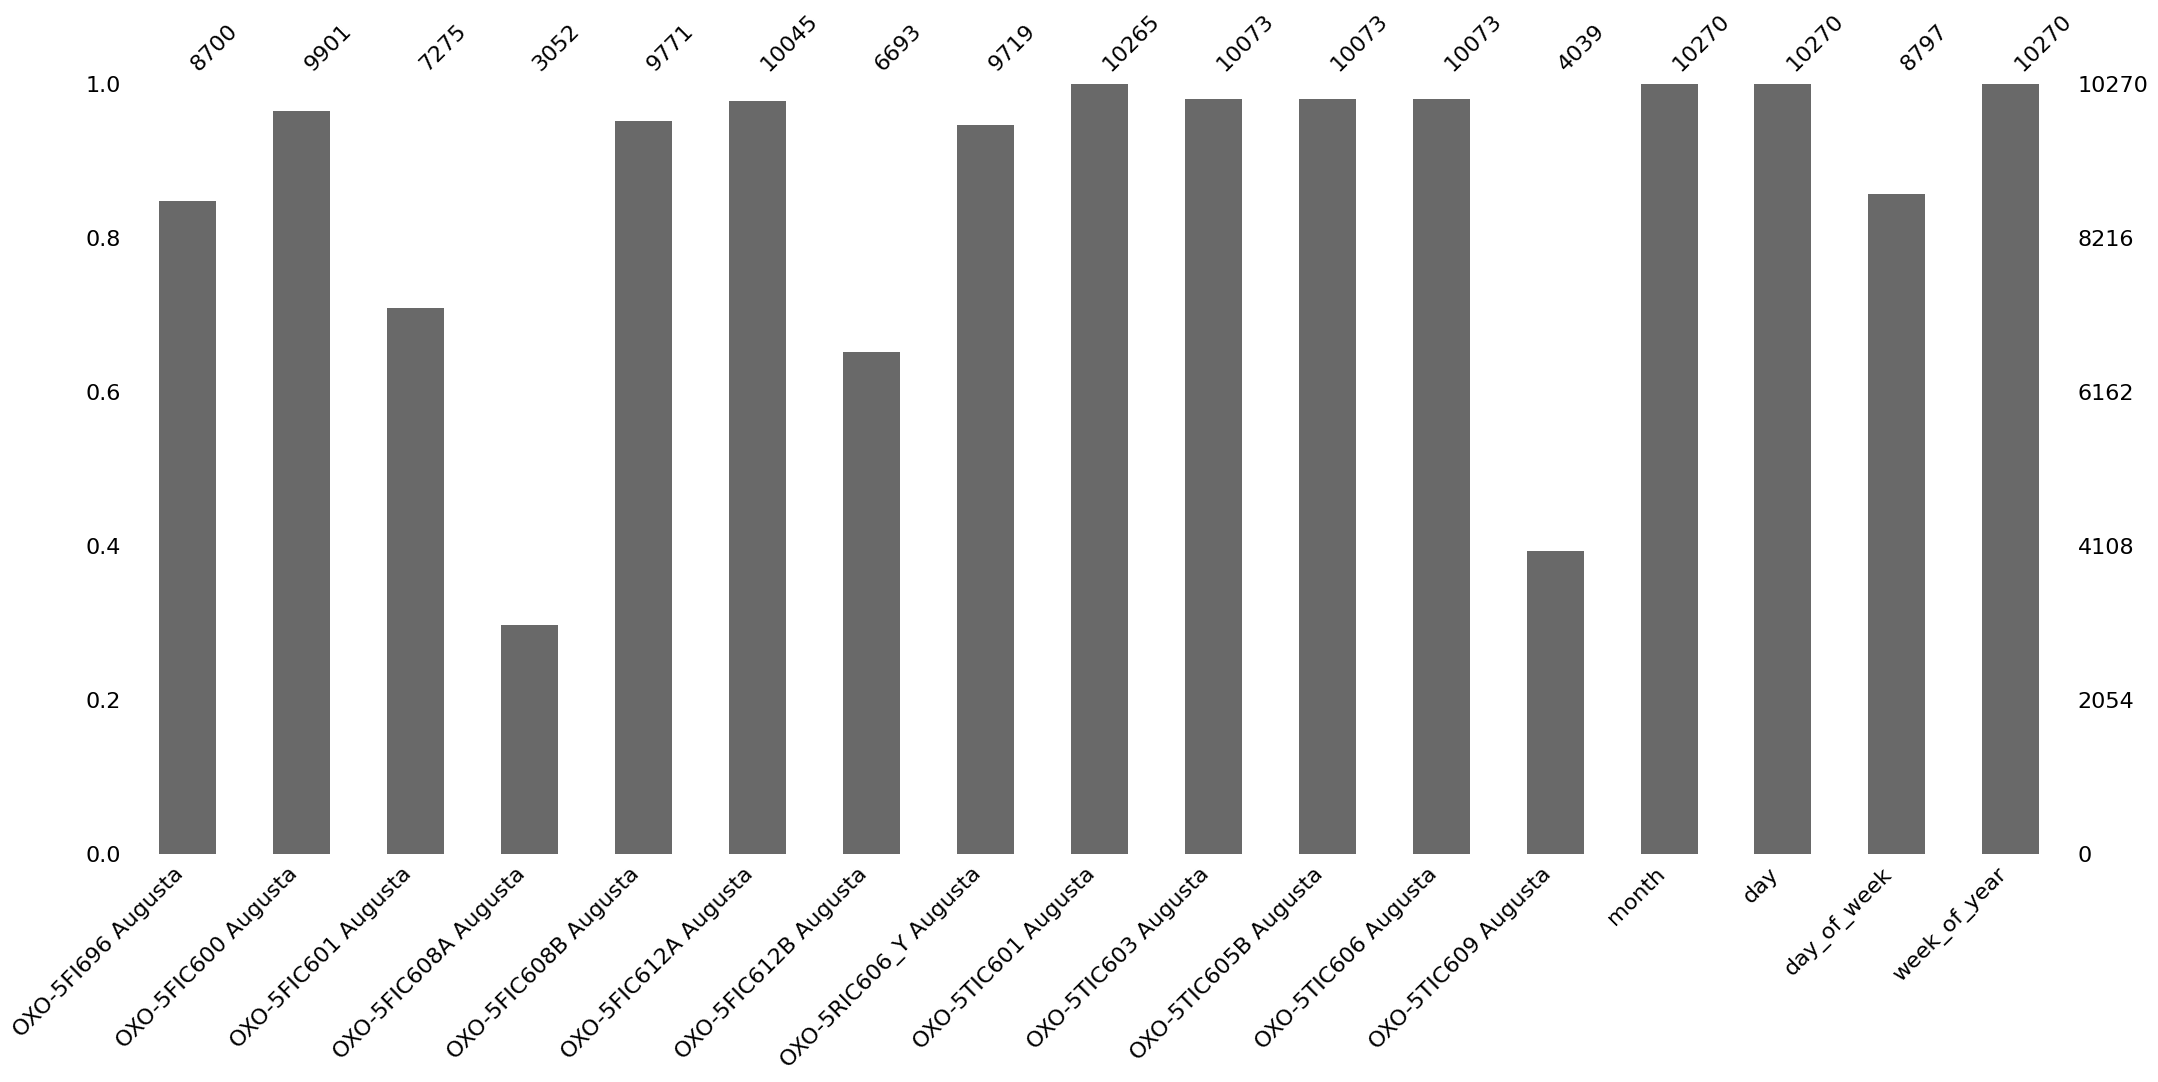

In [174]:
# Displaying a bar chart for the non-missing values of each column
msno.bar(df)
plt.show()

In [175]:
# drop rows with missing values in the target_list
df = df.dropna(subset=target_list[0])
df.shape

(8700, 17)

In [176]:
pd.isnull(df).sum()[pd.isnull(df).sum() / df.shape[0] > 0.5]

OXO-5FIC608A Augusta    5649
OXO-5TIC609 Augusta     6226
dtype: int64

In [177]:
del_cols = [i for i in df.columns if df[i].isnull().sum() / df.shape[0] > 0.5]
print(del_cols)

['OXO-5FIC608A Augusta', 'OXO-5TIC609 Augusta']


In [178]:
# drop columns with more than 50% missing values
# for col in del_cols:
#     if col not in target_list and tag_dict[col] != 'Control':
#         df.drop(columns=col, inplace=True)
# for col in del_cols:
#     if col not in target_list:
#         df.drop(columns=col, inplace=True)

In [179]:
# Check if there are deleted successful
df.shape

(8700, 17)

In [180]:
# Fill the rest with missing values
# fill_cols = [i for i in df.columns if df[i].isnull().sum()>0]
# print(fill_cols)
# print(len(fill_cols))

In [181]:
# # fill in the missing values with the mean of each column
# for j in fill_cols:
#     df[j]=df[j].fillna(df[j].mean())

# # Check if there is still a column that has missing values
# fill_cols = [i for i in df.columns if df[i].isnull().sum()>0]
# print(fill_cols)

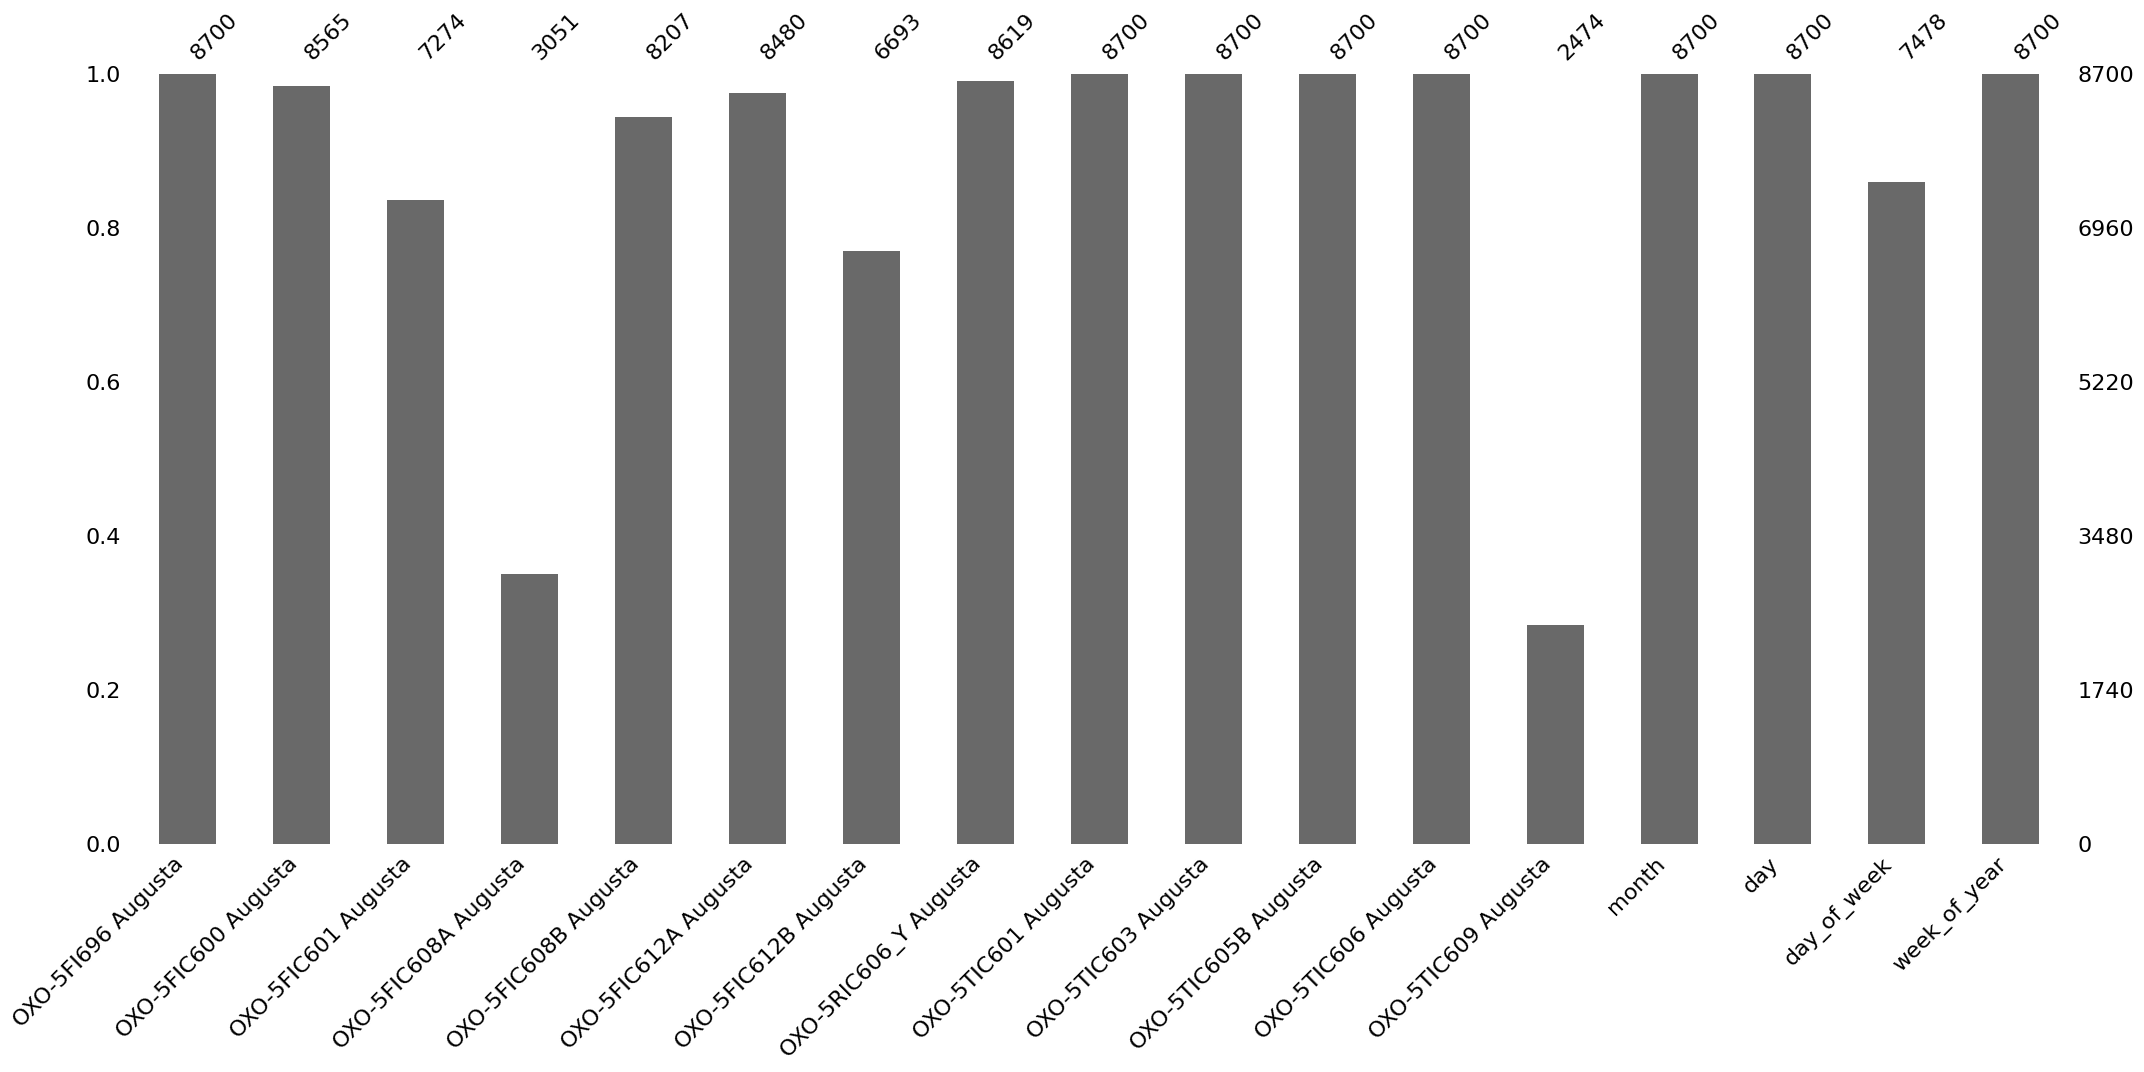

In [182]:
msno.bar(df)
plt.show()

### Target Variables Distribution<a name="clean"></a>

In [183]:
import plotly.express as px

fig = px.line(df, x=df.index, y=target_list)
fig.update_layout(
    width=1200,
    height=600
)
# fig.write_html("./image/target_variables.html")
fig.show()

In [184]:
# find indices where value goes below the threshold
threshold = 2000

zero_indices = df[df[cfg.kpi1.tag1] < threshold].index
print(zero_indices.shape)

# output timestamps
# for index in zero_indices:
#     print(df['Date'][index])

# delete rows
# df = df.drop(zero_indices)

(1466,)


In [185]:
df.shape

(8700, 17)

In [186]:
# Check if rows are deleted successfully
# df.loc[(df.index >= '2021-03-06') & (df.index < '2021-03-07')]

In [187]:
target_list

['OXO-5FI696 Augusta',
 'OXO-5FIC600 Augusta',
 'OXO-5FIC601 Augusta',
 'OXO-5FIC612A Augusta',
 'OXO-5FIC612B Augusta']

KPI1 Variation

In [188]:
# Let's check KPI1
kpi = df[target_list[0]] / ((df[target_list[3]] + df[target_list[4]])*1000 + df[target_list[1]] + df[target_list[2]])
df['kpi1'] = kpi

fig = px.line(df, x=df.index, y=kpi)
fig.update_layout(
    width=1200,
    height=600
)
# fig.write_html("./image/target_variables.html")
fig.show()

In [189]:
# View the value between 0 and 1.5, mark the df points out of [0.84, 0.9] as red

fig = px.line(df, x=df.index, y=kpi)
fig.update_layout(
    width=1200,
    height=600,
    yaxis=dict(range=[0, 1.5])
)
fig.add_shape(
        # Line Horizontal
        type="line",
        x0=df.index[0],
        y0=0.84,
        x1=df.index[-1],
        y1=0.84,
        line=dict(
            color="Red",
            width=2,
            dash="dashdot",
        ),
    )
fig.add_shape(
        # Line Horizontal
        type="line",
        x0=df.index[0],
        y0=0.9,
        x1=df.index[-1],
        y1=0.9,
        line=dict(
            color="Red",
            width=2,
            dash="dashdot",
        ),
    )
# fig.add_trace(go.Scatter(
#     x=df.index,
#     y=kpi,
#     mode="markers",
#     marker=dict(
#         color='rgba(255, 0, 0, 0.5)',
#         size=5,
#         line=dict(
#             color='DarkSlateGrey',
#             width=2
#         )
#     )
# ))

# fig.write_html("./image/target_variables.html")
fig.show()

### Variance Analysis<a name="clean"></a>

In [190]:
# It's because the magnitude of the values in that column are large
# Let's try normalized std
norm_std = df.std(ddof=0) / df.mean()
norm_std

OXO-5FI696 Augusta       0.505185
OXO-5FIC600 Augusta      0.458773
OXO-5FIC601 Augusta      0.246199
OXO-5FIC608A Augusta     0.119350
OXO-5FIC608B Augusta     0.990861
OXO-5FIC612A Augusta     4.006248
OXO-5FIC612B Augusta     0.187989
OXO-5RIC606_Y Augusta    6.859121
OXO-5TIC601 Augusta      0.371184
OXO-5TIC603 Augusta      0.264992
OXO-5TIC605B Augusta     0.258255
OXO-5TIC606 Augusta      0.259255
OXO-5TIC609 Augusta      0.265429
month                    0.505534
day                      0.556837
day_of_week              0.486148
week_of_year             0.538737
kpi1                     0.219206
dtype: float64

In [191]:
fig = go.Figure(data=[go.Bar(x=df.columns, y=norm_std)])
fig.update_layout(
    width=1200,
    height=600
)
fig.show()

In [192]:
# Take a look at that weird tag

fig = px.line(df, x=df.index, y='OXO-5RIC606_Y Augusta')
fig.update_layout(
    width=1200,
    height=600
)
# fig.write_html("./image/target_variables.html")
fig.show()

In [193]:
# That column has lots of spikes, and also remain in 0 for a long time, so we decided to drop it.
# if tag_dict['OXO-5RIC606_Y Augusta'] != 'Control':
#     df = df.drop(columns=['OXO-5RIC606_Y Augusta'])

# df = df.drop(columns=['OXO-5RIC606_Y Augusta'])
df.shape

(8700, 18)

In [194]:
df.to_csv(cfg.path.processed_data_new_tags)

In [195]:
# Check for extremely small variance

small_std = [x for x in norm_std if x < 0.1]
small_std

[]